## Compare Trusted API Categories to Shallalist and Model Predictions for comScore 2004

comScore maintains a panel of about 100,000 users. And it sells anonymized domain level browsing data of these users. A few years ago, to learn about the browsing behavior of these users, we used the [TrustedSource API](https://www.trustedsource.org/?p=mcafee), mantained by McAfee, to get the the category of content for all the unique domains. (The script for getting the data is posted [here](https://github.com/themains/trusted). And the data can be downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/BPS1OK).

So when we developed pydomains, we thought about checking how the categories obtained using Shallalist measure up against the TrustedSource API. There are some reasons to expect that things won't turn out well. A bunch of time has passed, the categorization scheme is a bit different, and for some sites similar people will assign different labels. But it is a useful exercise. We compare the TrustedSource API results to both the Shallalist categories and the predicted labels obtained from the Shallalist model. To do that, we first got the category of content hosted by the domain using all the methods in pydomain for all the unique domains in comScore 2004. See the script [here](https://raw.githubusercontent.com/themains/pydomains/master/pydomains/app/comscore-2004.ipynb). We will post the data to https://doi.org/10.7910/DVN/DXSNFA.


In [1]:
import pandas as pd

### Load Shallalist Categories and Predicted Labels

In [2]:
# Load data with shallalist categories and the predicted labels using the Shallalist model

df = pd.read_csv('/opt/comscore/pydomains/cs2004_unique_domains_pydomains.csv.bz2', usecols = ['domain_names', 'shalla_2017_cat', 'pred_shalla_2017_lab'])
df.columns = ['domain_name', 'pred_shalla_2017_lab', 'shalla_2017_cat']

# Top Category in Shallalist
df['shalla_2017_top_cat'] = df['shalla_2017_cat'].apply(lambda c: c.split('|')[0] if not pd.isnull(c) else 'UNKNOWN')

# Predicted Category based on the Shallalist model
df['pred_shalla_2017_top_lab'] = df['pred_shalla_2017_lab'].apply(lambda c: c.split('|')[0] if not pd.isnull(c) else 'UNKNOWN')
df

,domain_name,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab
0,2o7.net,others,tracker,tracker,others
1,aol.com,others,news|isp,news,others
2,googlesyndication.com-o02,others,NaN,UNKNOWN,others
3,adultfriendfinder.com,porn,porn|dating,porn,porn
4,adzones.com,adv,adv,adv,adv
5,aol.com-o07,recreation/sports,NaN,UNKNOWN,recreation/sports
6,aol.com-prop,others,NaN,UNKNOWN,others
7,as5000.com,porn,NaN,UNKNOWN,porn
8,atdmt.com,shopping,adv|tracker,adv,shopping
9,bangbrosonline.com,porn,porn,porn,porn


### Load Trusted API

In [3]:
df2 = pd.read_csv('/opt/comscore/pydomains/comScore_unique_2004.csv')
df2.columns = ['domain_name', 'url_class']

## We are going to filter on domains for which the category is known
df2 = df2.loc[df2['url_class'] != 'UNKNOWN']
df2

,domain_name,url_class
1,rrdsb.com,Education/Reference
2,hotresume.com,Job Search
3,mdr.org,Health
4,addressamerica.com,Non-Profit/Advocacy/NGO
5,oliebollen.com,Online Shopping
6,credit-card-application-approval-online.com,Finance/Banking
7,laneworkforce.org,Job Search
8,carltonbale.com,Personal Pages
9,hotxxxmovie.com,Pornography
10,cafb29b24.org,Marketing/Merchandising


### Left Join on the filtered comScore data

In [4]:
mdf = df2.merge(df, how='left', on='domain_name')
mdf

,domain_name,url_class,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab
0,rrdsb.com,Education/Reference,finance/banking,NaN,UNKNOWN,finance/banking
1,hotresume.com,Job Search,jobsearch,porn,porn,jobsearch
2,mdr.org,Health,recreation/sports,NaN,UNKNOWN,recreation/sports
3,addressamerica.com,Non-Profit/Advocacy/NGO,recreation/sports,NaN,UNKNOWN,recreation/sports
4,oliebollen.com,Online Shopping,porn,shopping,shopping,porn
5,credit-card-application-approval-online.com,Finance/Banking,shopping,NaN,UNKNOWN,shopping
6,laneworkforce.org,Job Search,others,NaN,UNKNOWN,others
7,carltonbale.com,Personal Pages,recreation/travel,NaN,UNKNOWN,recreation/travel
8,hotxxxmovie.com,Pornography,porn,NaN,UNKNOWN,porn
9,cafb29b24.org,Marketing/Merchandising,others,automobile/planes,automobile/planes,others


### Top 10 categories in comScore 2004 based on Trusted API

In [5]:
gdf1 = df2.groupby('url_class').agg({'url_class': 'count'})
gdf1.columns = ['percent']
gdf1['percent'] = gdf1 * 100.0 / gdf1.sum()
gdf1.sort_values('percent', ascending=False)[:10]

,percent
url_class,
Pornography,18.099709
Online Shopping,9.299063
Entertainment,7.219961
Business,5.893583
Marketing/Merchandising,4.548922
Education/Reference,4.467826
Internet Services,4.178713
Travel,3.159729
Health,3.111680


### Top 10 categories in comScore 2004 based on Shallalist

In [6]:
gdf = df.groupby('shalla_2017_top_cat').agg({'shalla_2017_top_cat': 'count'})
gdf.columns = ['percent']
gdf['percent'] = gdf * 100.0 / gdf.sum()
gdf.sort_values('percent', ascending=False)[:10]

,percent
shalla_2017_top_cat,
UNKNOWN,78.072284
porn,12.278061
shopping,3.134071
news,1.424128
recreation/travel,1.166598
recreation/sports,1.124863
education/schools,0.290759
hobby/pets,0.285122
spyware,0.235476


### Top 10 categories in comScore 2004 based on the Shallalist Model

In [7]:
gdf2 = df.groupby('pred_shalla_2017_top_lab').agg({'pred_shalla_2017_top_lab': 'count'})
gdf2.columns = ['percent']
gdf2['percent'] = gdf2 * 100.0 / gdf2.sum()
gdf2.sort_values('percent', ascending=False)[:10]

,percent
pred_shalla_2017_top_lab,
porn,40.680021
shopping,25.589010
others,11.278699
recreation/sports,7.665468
recreation/travel,6.078357
anonvpn,1.472984
gamble,0.775359
hobby/pets,0.732140
hobby/games-online,0.710877


In [8]:
# Fix Category Mapping

mapping = {'porn': 'Pornography',  'shopping': 'Online Shopping', 'education/schools': 'Education/Reference', 'recreation/travel': 'Travel', 'UNKNOWN': 'UNKNOWN'}

def remap_trusted_category(lab):
    if lab in mapping.values():
        return lab
    else:
        return 'OTHERS'

def remap_shalla_category(lab):
    if lab in mapping:
        return mapping[lab]
    else:
        return 'OTHERS'

mdf['trusted_lab'] = mdf.url_class.apply(lambda c: remap_trusted_category(c))
mdf['shalla_lab'] = mdf.shalla_2017_top_cat.apply(lambda c: remap_shalla_category(c))
mdf['predict_shalla_lab'] = mdf.pred_shalla_2017_top_lab.apply(lambda c: remap_shalla_category(c))
mdf

,domain_name,url_class,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab,trusted_lab,shalla_lab,predict_shalla_lab
0,rrdsb.com,Education/Reference,finance/banking,NaN,UNKNOWN,finance/banking,Education/Reference,UNKNOWN,OTHERS
1,hotresume.com,Job Search,jobsearch,porn,porn,jobsearch,OTHERS,Pornography,OTHERS
2,mdr.org,Health,recreation/sports,NaN,UNKNOWN,recreation/sports,OTHERS,UNKNOWN,OTHERS
3,addressamerica.com,Non-Profit/Advocacy/NGO,recreation/sports,NaN,UNKNOWN,recreation/sports,OTHERS,UNKNOWN,OTHERS
4,oliebollen.com,Online Shopping,porn,shopping,shopping,porn,Online Shopping,Online Shopping,Pornography
5,credit-card-application-approval-online.com,Finance/Banking,shopping,NaN,UNKNOWN,shopping,OTHERS,UNKNOWN,Online Shopping
6,laneworkforce.org,Job Search,others,NaN,UNKNOWN,others,OTHERS,UNKNOWN,OTHERS
7,carltonbale.com,Personal Pages,recreation/travel,NaN,UNKNOWN,recreation/travel,OTHERS,UNKNOWN,Travel
8,hotxxxmovie.com,Pornography,porn,NaN,UNKNOWN,porn,Pornography,UNKNOWN,Pornography
9,cafb29b24.org,Marketing/Merchandising,others,automobile/planes,automobile/planes,others,OTHERS,OTHERS,OTHERS


## Trusted API vs. Shallalist

Confusion matrix:
Predicted            Education/Reference  OTHERS  Online Shopping  \
Actual                                                              
Education/Reference                 2899     915              598   
OTHERS                                40   46723            14752   
Online Shopping                        0    1860            15903   
Pornography                            0     550               69   
Travel                                 0     754              131   
__all__                             2939   50802            31453   

Predicted            Pornography  Travel  __all__  
Actual                                             
Education/Reference           99     156     4667  
OTHERS                     14431    2982    78928  
Online Shopping             2115     233    20111  
Pornography               106837      13   107469  
Travel                        99    8381     9365  
__all__                   123581   11765   220540  


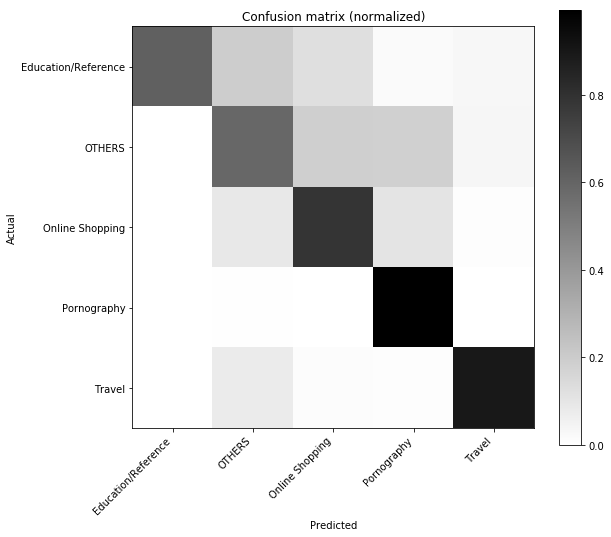

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_confusion import ConfusionMatrix

# We are going to take out uknown for now because all it shows is that coverage of shallalist is worse than TrustedAPI.
# It is something we know from above.
cm = ConfusionMatrix(mdf[mdf.shalla_lab != 'UNKNOWN'].trusted_lab, mdf[mdf.shalla_lab != 'UNKNOWN'].shalla_lab)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)

## Trusted API vs. Shallalist Prediction Model

Confusion matrix:
Predicted            Education/Reference  OTHERS  Online Shopping  \
Actual                                                              
Education/Reference                 5316   13149             9194   
OTHERS                              1196  185477           161308   
Online Shopping                       21   13389            40077   
Pornography                           21    7823             9778   
Travel                                31    3849             4656   
__all__                             6585  223687           225013   

Predicted            Pornography  Travel  __all__  
Actual                                             
Education/Reference         8658    1807    38124  
OTHERS                    173608   32833   554422  
Online Shopping            21638    4224    79349  
Pornography               134583    2240   154445  
Travel                      3973   14453    26962  
__all__                   342460   55557   853302  


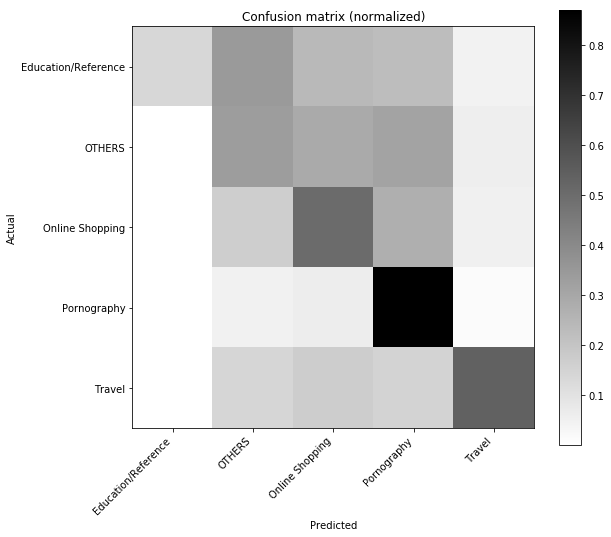

In [10]:
cm = ConfusionMatrix(mdf.trusted_lab, mdf.predict_shalla_lab)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)